In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Tehnikum Data analytics\\Pandas\\games.csv")


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
platform_mean = df.groupby('Platform')['NA_sales'].mean()
platform_mean.head()

Platform
2600    0.681203
3DO     0.000000
3DS     0.160558
DC      0.104423
DS      0.177778
Name: NA_sales, dtype: float64

## 1 задание

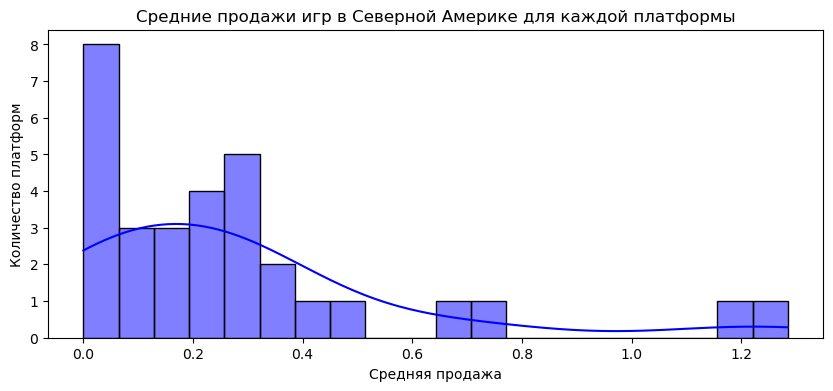

In [6]:
plt.figure(figsize=(10, 4))

sns.histplot(platform_mean, bins=20, kde=True, color='blue')
plt.title('Средние продажи игр в Северной Америке для каждой платформы')
plt.xlabel('Средняя продажа')
plt.ylabel('Количество платформ')
plt.show()


## 2 задание

In [7]:
df_year2000 = df[df['Year_of_Release']>2000].groupby('Year_of_Release')['Name'].count()
df_year2000

Year_of_Release
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Name, dtype: int64

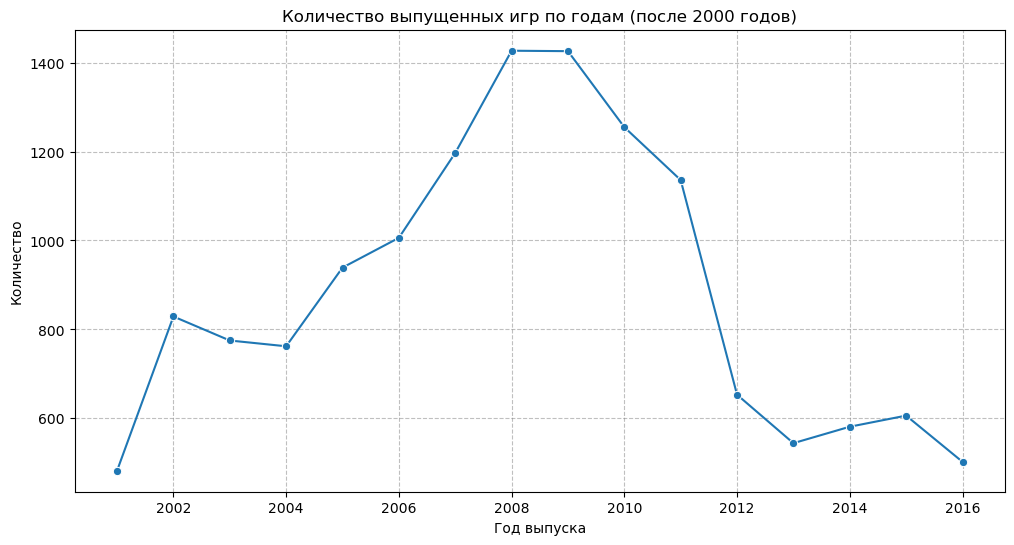

In [8]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=df_year2000.index, y=df_year2000.values, marker='o')

plt.title('Количество выпущенных игр по годам (после 2000 годов)')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.grid(color='grey', alpha=0.5, linestyle='--')

plt.show()

## 3 задание

In [9]:
genre_sum = df.groupby('Genre')['NA_sales'].sum()
genre_sum

Genre
Action          879.01
Adventure       105.26
Fighting        223.36
Misc            407.27
Platform        445.50
Puzzle          122.87
Racing          359.35
Role-Playing    330.81
Shooter         592.24
Simulation      181.92
Sports          684.43
Strategy         68.55
Name: NA_sales, dtype: float64

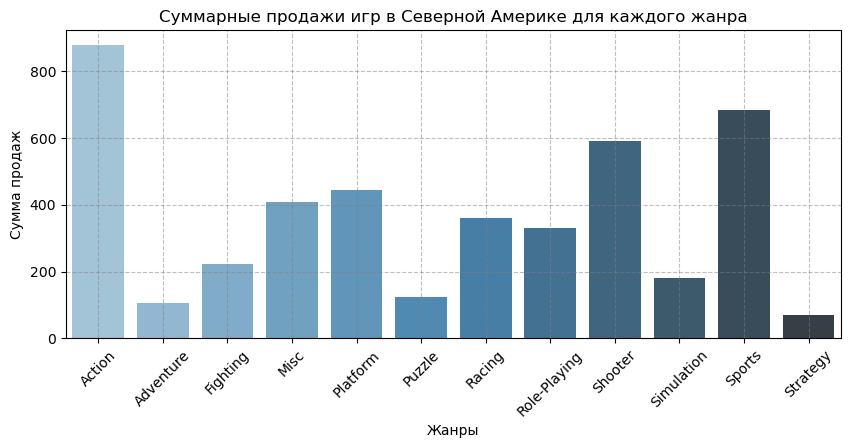

In [10]:
plt.figure(figsize=(10, 4))

sns.barplot(x=genre_sum.index, y=genre_sum.values, palette='Blues_d')
plt.title('Cуммарные продажи игр в Северной Америке для каждого жанра')
plt.xlabel('Жанры')
plt.xticks(rotation=45)
plt.ylabel('Сумма продаж')
plt.grid(color='grey', alpha=0.5, linestyle='--')
plt.show()


## 4 задание

In [11]:
platform_sum = df.groupby('Platform')['NA_sales'].sum()
platform_sum

Platform
2600     90.60
3DO       0.00
3DS      83.49
DC        5.43
DS      382.40
GB      114.32
GBA     187.54
GC      133.46
GEN      21.05
GG        0.00
N64     139.02
NES     125.94
NG        0.00
PC       94.53
PCFX      0.00
PS      336.52
PS2     583.84
PS3     393.49
PS4     108.74
PSP     109.17
PSV      12.58
SAT       0.72
SCD       1.00
SNES     61.23
TG16      0.00
WS        0.00
Wii     496.90
WiiU     38.10
X360    602.47
XB      186.69
XOne     93.12
Name: NA_sales, dtype: float64

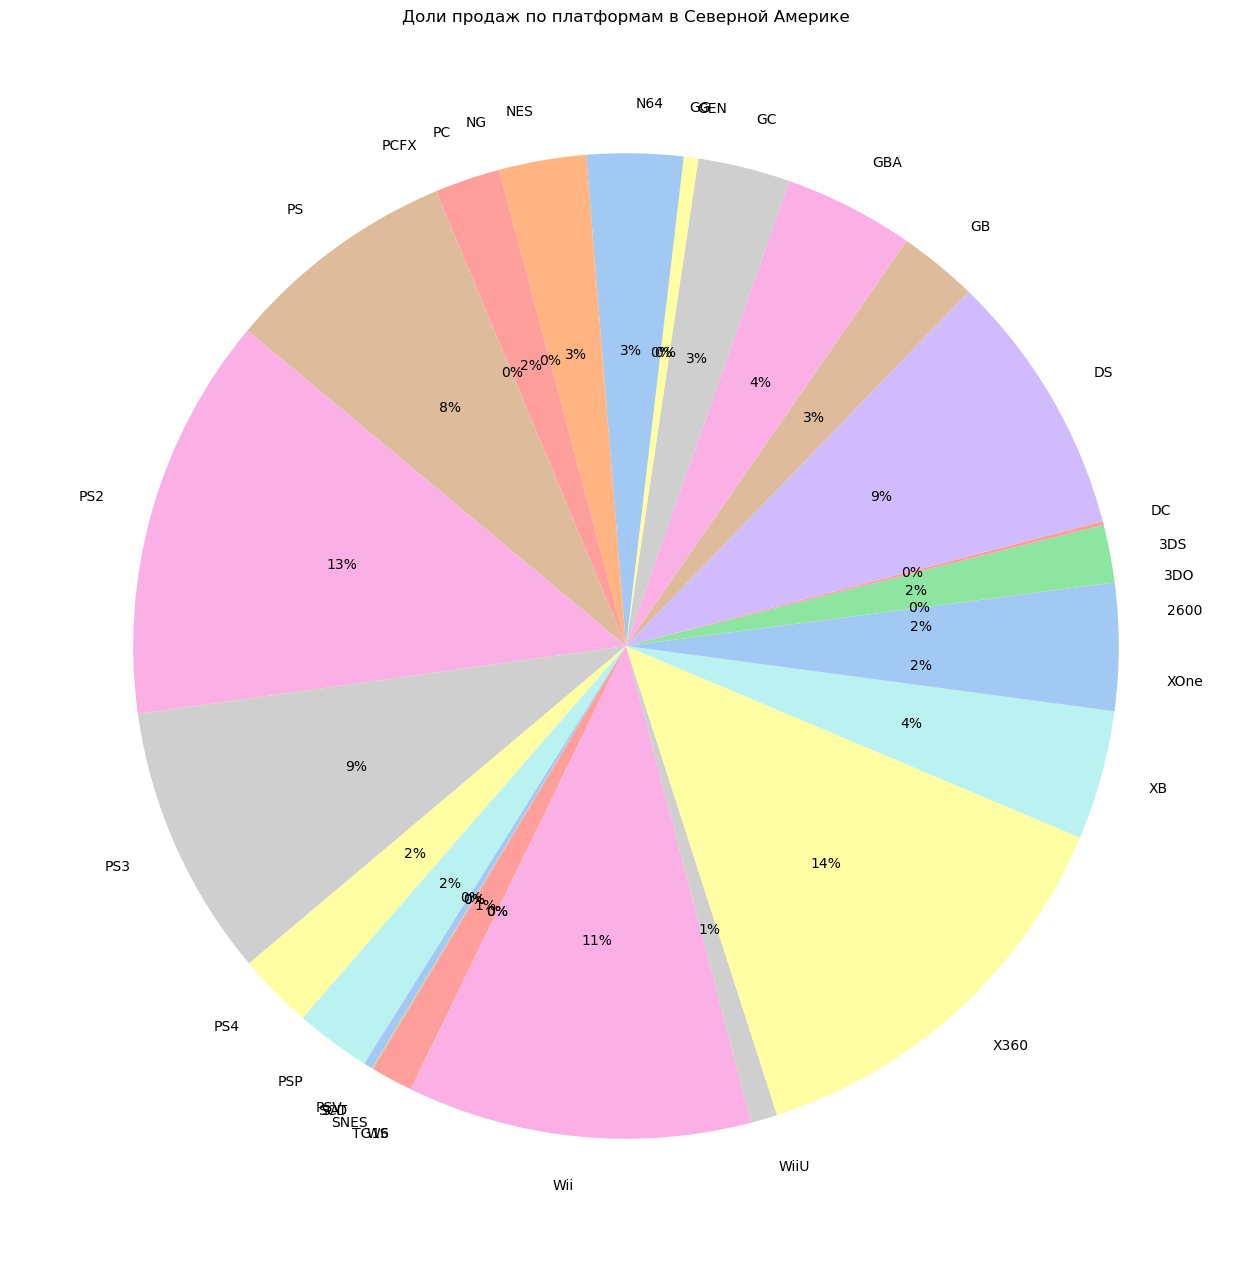

In [12]:
plt.figure(figsize=(16, 16))

plt.pie(platform_sum, labels=platform_sum.index, autopct='%1.f%%', colors=sns.color_palette('pastel'))

plt.title('Доли продаж по платформам в Северной Америке')
plt.show()

## 5 задание

In [13]:
genre_median = df.groupby('Genre')['NA_sales'].median()
genre_median

Genre
Action          0.10
Adventure       0.00
Fighting        0.08
Misc            0.08
Platform        0.14
Puzzle          0.05
Racing          0.10
Role-Playing    0.04
Shooter         0.12
Simulation      0.07
Sports          0.11
Strategy        0.00
Name: NA_sales, dtype: float64

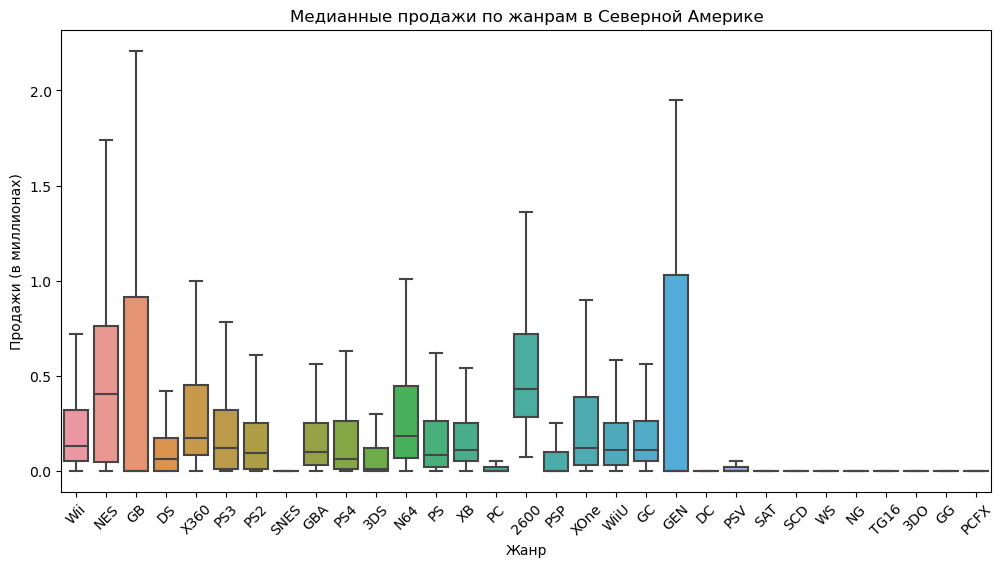

In [14]:
plt.figure(figsize=(12, 6))


sns.boxplot(x='Platform', y='NA_sales', data=df.loc[:, ['Platform', 'NA_sales']], showfliers=False)

plt.title('Медианные продажи по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи (в миллионах)')
plt.xticks(rotation=45)
plt.show()



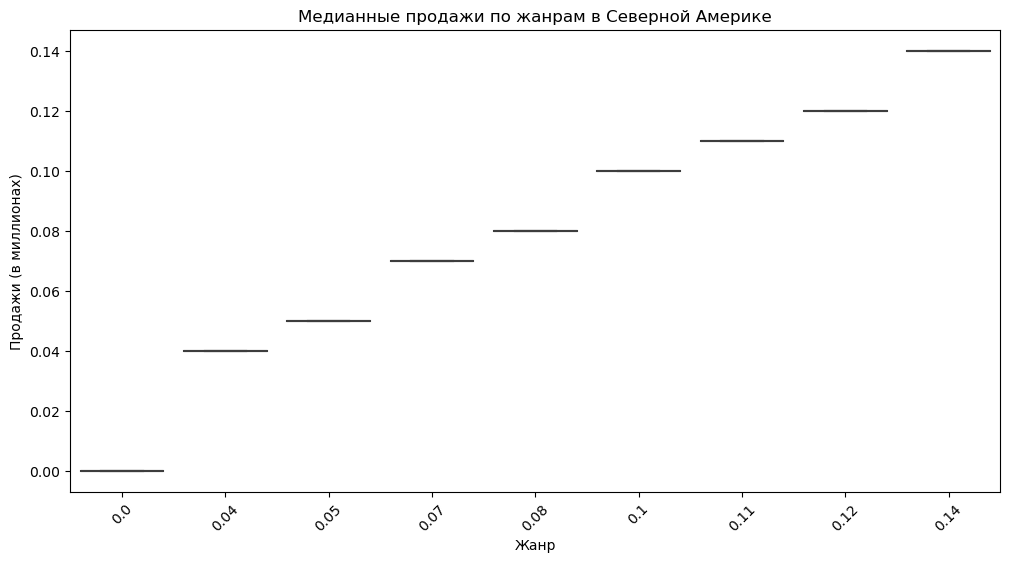

In [15]:
plt.figure(figsize=(12, 6))


sns.boxplot(x=genre_median.index, y=genre_median.values, data=genre_median)

plt.title('Медианные продажи по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Продажи (в миллионах)')
plt.xticks(rotation=45)
plt.show()

## 6 задание

In [16]:
platform_year = df[df['Year_of_Release']>2000].groupby(['Platform', 'Year_of_Release'])['NA_sales'].sum().unstack()

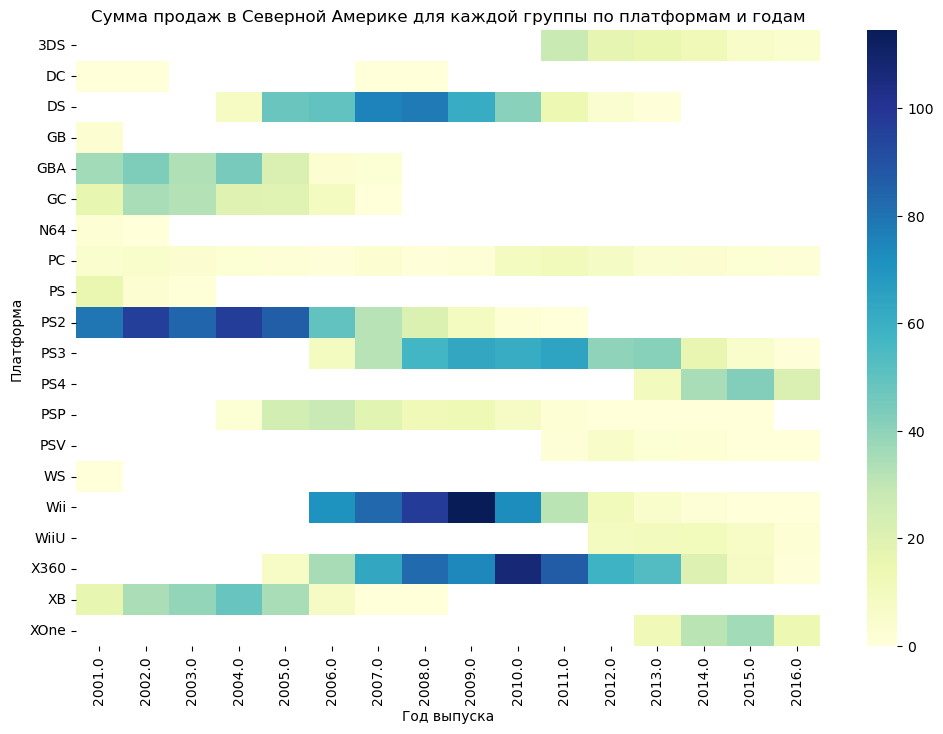

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(platform_year, cmap='YlGnBu', annot=False)
plt.title('Сумма продаж в Северной Америке для каждой группы по платформам и годам')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.show()